In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# **Pandas**

In [ ]:
# 1.Obtener Datos

df = pd.read_csv('https://pilas.exp.dc.uba.ar/datos/datos_reales_limpios_0.csv')
#display(df)

In [ ]:
# 2.Columnas

df.columns

Index(['ID', 'ApellidoNombre', 'Genero', 'Edad', 'Carrera', 'Avance',
       'Promedio', 'NotaBaja', 'Inglés', 'Francés', 'Cuadro', 'Altura', 'Peso',
       'AlturaMama', 'ContexturaMama', 'AlturaPapa', 'Zodiaco',
       'HoroscopoChino', 'Toro'],
      dtype='object')

In [ ]:
# 3.

df.describe()

ID        Edad      Avance  ...  AlturaMama  AlturaPapa         Toro
count  164.00000  162.000000  164.000000  ...  160.000000  160.000000   163.000000
mean    82.50000   27.493827    3.231707  ...  145.098375  154.377938   638.972690
std     47.48684   11.080870    1.533261  ...   53.208455   59.043238   760.236254
min      1.00000   13.000000    1.000000  ...    1.500000    0.000000    87.000000
25%     41.75000   21.000000    2.000000  ...  155.000000  169.750000   300.000000
50%     82.50000   24.000000    3.000000  ...  162.000000  174.000000   489.000000
75%    123.25000   29.000000    5.000000  ...  167.250000  180.000000   650.000000
max    164.00000   75.000000    5.000000  ...  300.000000  300.000000  8000.000000

[8 rows x 12 columns]

i) La altura más alta es de 200 cm, la más baja es de 1.55 cm.
ii) La edad promedio es de 27.5 años
iii) Faltan los datos del tipo string

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              164 non-null    int64  
 1   ApellidoNombre  161 non-null    object 
 2   Genero          163 non-null    object 
 3   Edad            162 non-null    float64
 4   Carrera         161 non-null    object 
 5   Avance          164 non-null    int64  
 6   Promedio        155 non-null    float64
 7   NotaBaja        154 non-null    float64
 8   Inglés          164 non-null    int64  
 9   Francés         164 non-null    int64  
 10  Cuadro          141 non-null    object 
 11  Altura          162 non-null    float64
 12  Peso            162 non-null    float64
 13  AlturaMama      160 non-null    float64
 14  ContexturaMama  161 non-null    object 
 15  AlturaPapa      160 non-null    float64
 16  Zodiaco         163 non-null    object 
 17  HoroscopoChino  160 non-null    obj

In [ ]:
# 4.

alturas = df['Altura']
print(alturas.shape)
print('El promedio de alturas calculado por .mean es ' + str(alturas.mean()))
print('La altura más baja es ' + str(min(alturas)))
print('La altura más alta es ' + str(max(alturas)))
mean2 = 0
fails = 0
for i in range(len(alturas)):
    if alturas[i] >= 100.:
        mean2 += alturas[i]
    else:
        fails += 1
mean2 = mean2/(len(alturas) - fails)
print('El promedio excluyendo los datos "erroneos" es ' + str(mean2))

(164,)
El promedio de alturas calculado por .mean es 146.68537037037038
La altura más baja es 1.55
La altura más alta es 200.0
El promedio excluyendo los datos "erroneos" es 172.16058394160584


In [ ]:
# 5.

data = 0
for i in range(len(alturas)):
    if isinstance(alturas[i], float):
        data += 1
print(data)
print('Pero en el elemento 71 de alturas, es un dato no cargado (' + str(alturas[71]) + ').')

164
Pero en el elemento 71 de alturas, es un dato no cargado (nan).


Es decir, lo que hace pandas es ignorar en sus operaciones a estos datos.

In [ ]:
# 6.

pesos = df['Peso']
pesos.mean()

46231.45672630864

In [ ]:
# 7.

# display(df.sort_values('Edad'))
edades = df['Edad']
print('El estudiante más joven tiene ' + str(int(min(edades))) + ' años')
print('El estudiante más grande tiene ' + str(int(max(edades))) + ' años')
ejoven = df[edades == min(edades)]
print('El signo del horoscopo chino del estudiante más joven es ' + ejoven['HoroscopoChino'][ejoven.index[0]])
eviejo = df[edades == max(edades)]
print('El signo del horoscopo chino del estudiante más viejo es ' + eviejo['HoroscopoChino'][eviejo.index[0]])

El estudiante más joven tiene 13 años
El estudiante más grande tiene 75 años
El signo del horoscopo chino del estudiante más joven es Rata
El signo del horoscopo chino del estudiante más viejo es Dragón


In [ ]:
# 8.

estufis = df[df['Carrera'] == 'Ciencias Físicas']
print('Hay ' + str(estufis.shape[0]) + ' estudiantes de Ciencias Físicas.')
print('La edad promedio entre ellos es de ' + str(round(estufis['Edad'].mean(), 2)) + ' años.')
promediosfis = estufis['Promedio']
print('El estudiante de física con mejor promedio es hincha de ' + estufis['Cuadro'][promediosfis.idxmax()])
print('El promedio general es ' + str(round(promediosfis.mean(), 2)))

Hay 22 estudiantes de Ciencias Físicas.
La edad promedio entre ellos es de 27.36 años.
El estudiante de física con mejor promedio es hincha de Argentina
El promedio general es 8.41


In [ ]:
# 9.

carreras = set()
for i in range(len(df['Carrera'])):
    if isinstance(df['Carrera'][i], str):
        carreras.add(df['Carrera'][i])
promcarreras = dict()
for i in carreras:
    carrerai = df[df['Carrera'] == i]
    promcarreras[i] = carrerai['Promedio'].mean()
print('La carrera con el mejor promedio es ' + max(promcarreras, key=promcarreras.get))
print('La carrera con el menor promedio es ' + min(promcarreras, key=promcarreras.get))

La carrera con el mejor promedio es Ciencias Biológicas
La carrera con el menor promedio es Paleontología


In [ ]:
# 10.

yo = df[df['ApellidoNombre'] == 'Ackerman, Levi']
filtroP = df['Promedio'] < yo['Promedio'][yo.index[0]]
filtroA = df['Altura'] > yo['Altura'][yo.index[0]]
mayml = df[filtroP & filtroA]
print('Hay ' + str(mayml.shape[0]) + ' personas más altas y con menor promedio que yo.')

Hay 39 personas más altas y con menor promedio que yo.


In [ ]:
# 11.
maoml = df[filtroP | filtroA]
print('Hay ' + str(maoml.shape[0]) + ' personas más altas o con menor promedio que yo')

Hay 152 personas más altas o con menor promedio que yo


## 12.

In [ ]:
cuadros = set()
for i in range(len(df['Cuadro'])):
    if isinstance(df['Cuadro'][i], str):
        cuadros.add(df['Cuadro'][i])
deboca = 0
for i in cuadros:
    if (i[0] == 'B' or i[0] == 'b') and (i[1] == 'O' or i[1] == 'o'):
        deboca += df[df['Cuadro'] == i].shape[0]
deboca = round((deboca/df.shape[0])*100, 2)
print('El ' + str(deboca) + '% de los participantes son de Boca. Menos de la mitad.')

El 33.54% de los participantes son de Boca. Menos de la mitad.


In [ ]:
debio = df[df['Carrera'] == 'Ciencias Biológicas'].shape[0]
debio = round((debio/df.shape[0])*100, 2)
print('El ' + str(debio) + '% de los participantes son de biología. Menos de la mitad.')

El 42.68% de los participantes son de biología. Menos de la mitad.


In [ ]:
monos = df[df['HoroscopoChino'] == 'Mono']
prommonos = monos['Promedio'].mean()
promresto = df['Promedio'].mean()
if prommonos > promresto:
    print('Los monos tienen mejor promedio. (' + str(round(prommonos, 2)) + ' los monos contra ' +
          str(round(promresto, 2)) + ' el resto)')
else:
    print('Los monos no tienen mejor promedio. (' + str(round(prommonos, 2)) + ' los monos contra ' +
          str(round(promresto, 2)) + ' el resto)')

Los monos tienen mejor promedio. (8.36 los monos contra 8.2 el resto)


In [ ]:
gallos = df[df['HoroscopoChino'] == 'Gallo']
galloderiver = 0
for i in cuadros:
    if (i[0] == 'R' or i[0] == 'r') and (i[1] == 'I' or i[1] == 'i'):
        galloderiver += gallos[gallos['Cuadro'] == i].shape[0]
galloderiver = round((galloderiver/gallos.shape[0])*100, 3)
print('Resulta que el ' + str(galloderiver) + '% de los gallos son de river.')

Resulta que el 50.0% de los gallos son de river.


# **Pandas & Seaborn**

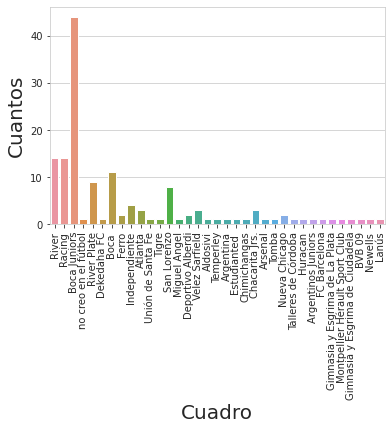

In [ ]:
# 13.

with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    sns.countplot(data=df, x='Cuadro')
    plt.xticks(rotation=90)
    plt.xlabel(xlabel='Cuadro', fontsize=20)
    plt.ylabel(ylabel='Cuantos', fontsize=20)
    plt.show()

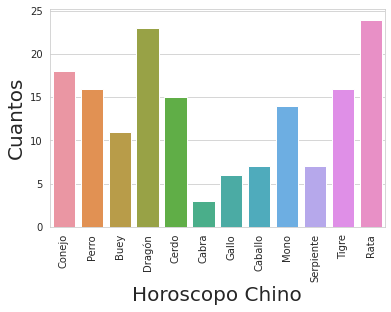

In [ ]:
# 14.

sns.countplot(data=df, x='HoroscopoChino')
plt.xticks(rotation=90)
plt.xlabel(xlabel='Horoscopo Chino', fontsize=20)
plt.ylabel(ylabel='Cuantos', fontsize=20)
plt.show()

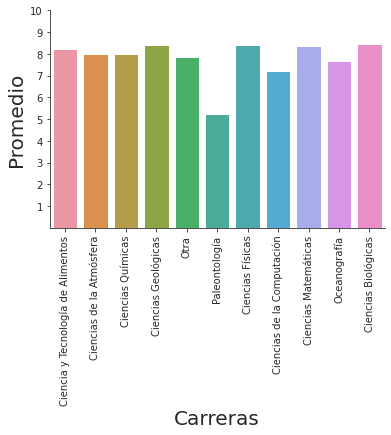

In [ ]:
## 15.

promcarreraslista = []
carreraslista = []
for i in carreras:
    if isinstance(i, str):
        promcarreraslista.append(promcarreras[i])
        carreraslista.append(i)
with sns.axes_style('ticks'):
    sns.barplot(x=carreraslista, y=promcarreraslista)
    plt.xticks(rotation=90)
    plt.yticks(np.arange(1, 11))
    sns.despine()
    plt.xlabel(xlabel='Carreras', fontsize=15)
    plt.ylabel(ylabel='Promedio', fontsize=15)
    plt.show()

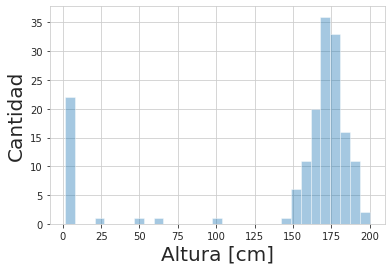

In [ ]:
# 16.

with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    sns.distplot(df['Altura'], kde=False)
    plt.xlabel(xlabel='Altura [cm]', fontsize=20)
    plt.ylabel(ylabel='Cantidad', fontsize=20)
    plt.show()

Como bien se observó en 6., hay datos mal cargados. En muchos casos, se anotaron unidades en metros en lugar de en centimetros, en otros casos los errores son desconocidos.

In [ ]:
# 17.

# display(df[['ApellidoNombre', 'Altura']])

def corregir_alturas(x):
    if x <= 2.:
        x = x * 100.
    return x

df['Altura'] = df['Altura'].apply(corregir_alturas)
# display(df[['ApellidoNombre', 'Altura']])

Es poco claro si correponde sumarle 100 cm a los datos menores a un metro, o sí deberían eliminarse.
En este caso decidí dejarlos como estan. Por ejemplo, no parece incorrecto que Bob Esponja mida 64 cm, pero otros casos son más extraños

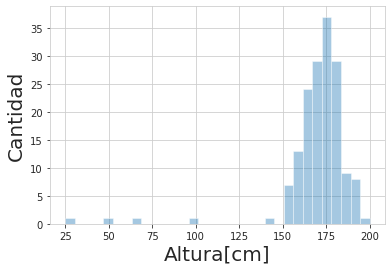

In [ ]:
with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    sns.distplot(df['Altura'], kde=False, axlabel='Altura[cm]')
    plt.xlabel(xlabel='Altura[cm]', fontsize=20)
    plt.ylabel(ylabel='Cantidad', fontsize=20)
    plt.show()

Nota Post ejercicio 17. Con los datos de altura expresados en metros ya convertidos a centimetros, el gráfico está mucho mejor.

## 18.

Mi respuesta inicial es 'No', pero graficaré el histograma de todos modos porque seaborn es hermoso :)

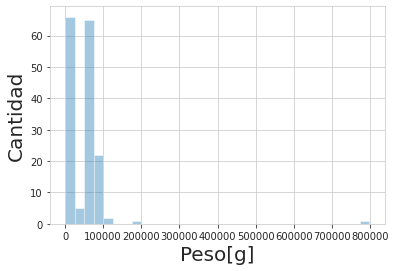

In [ ]:
with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    sns.distplot(df['Peso'], kde=False)
    plt.xlabel(xlabel='Peso[g]', fontsize=20)
    plt.ylabel(ylabel='Cantidad', fontsize=20)
    plt.show()

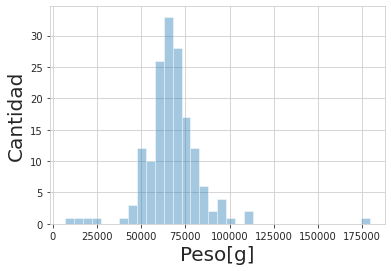

In [ ]:
def corregir_alturas(x):
    if x >= 200000.:  # Para pesos mayores a 200 kilogramos, consideraré que multiplicaron su peso en kilos por 10 mil en vez de por mil. 
        x = x  / 10.
    elif x >= 1200. and x < 12000.:  # Para pesos menores que 12 kilos y mayores que 1200 gramos, consideraré que multiplicaron su peso por cien en vez de por mil.
        x = x * 10.
    elif x >= 120. and x < 1200.:  # Para pesos menores que 1200 gramos y mayores que 120 gramos, consideraré que multiplicaron su peso por diez en vez de por mil. 
        x = x * 100.
    elif x < 120.:  # Para pesos menores que 120 gramos, consideraré que ingresaron su peso en kilos en vez de en gramos. 
        x = x * 1000.
    return x

df['Peso'] = df['Peso'].apply(corregir_alturas)

with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    sns.distplot(df['Peso'], kde=False)
    plt.xlabel(xlabel='Peso[g]', fontsize=20)
    plt.ylabel(ylabel='Cantidad', fontsize=20)
    plt.show()

## 19.

In [ ]:
 #with sns.axes_style('white'):
 #   sns.distplot(df['Genero'], kde=False)
 #   plt.show()

El codigo de arriba arroja un error ya qué los histogramas requieren valores numéricos continuos para su eje x. Podría correjir esto usando un gráfico de barras en vez de un histograma.

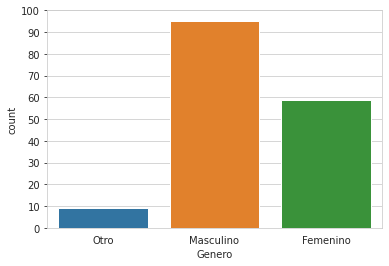

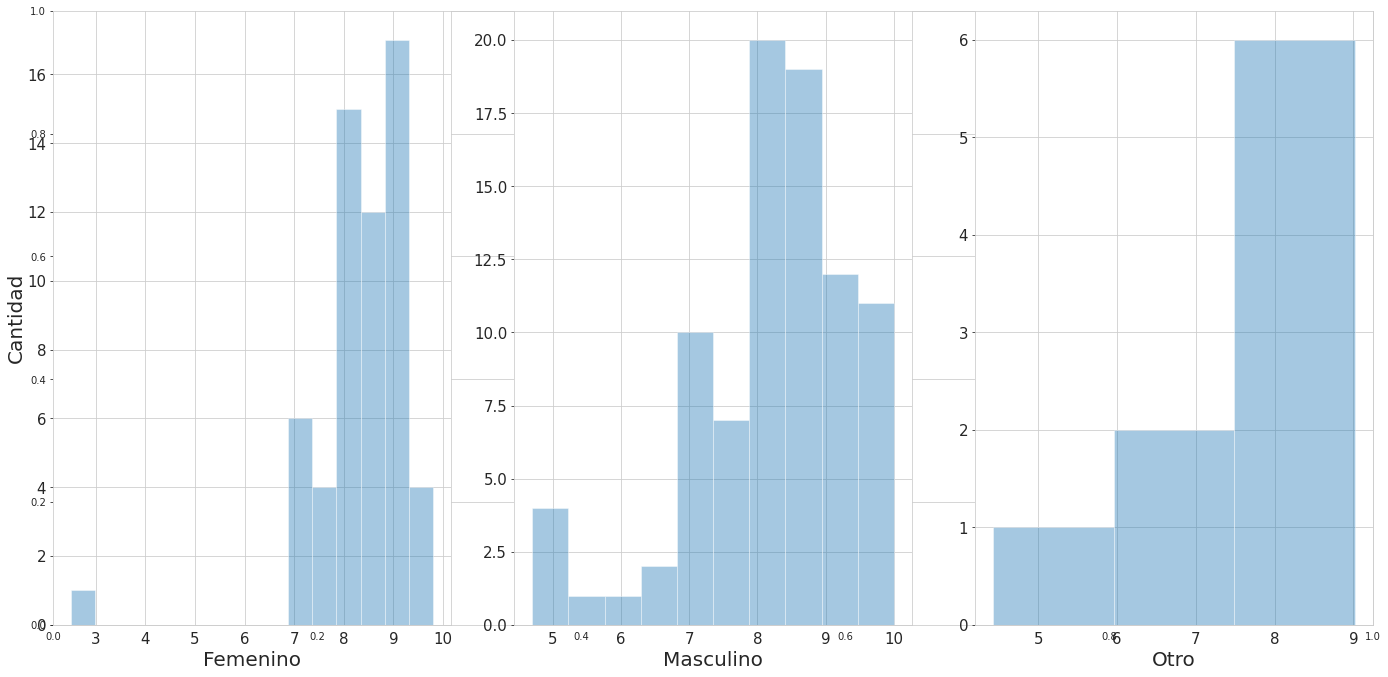

In [ ]:
with sns.axes_style('whitegrid', {'ytick.left': True}):
    sns.countplot(data=df, x='Genero')
    plt.yticks(np.arange(0, 110, 10))
    plt.show()

generos = set()
for i in range(len(df['Genero'])):
    if isinstance(df['Genero'][i], str):
        generos.add(df['Genero'][i])

with sns.axes_style('whitegrid', {'ytick.left': True}):
    f = plt.figure(figsize=(20, 10))
    gs = f.add_gridspec(1, len(generos))
    j = 0

    plt.ylabel(ylabel='Cantidad', fontsize=20)
    for i in generos:
        ax = f.add_subplot(gs[0, j])
        sns.distplot(df[df['Genero'] == i]['Promedio'], kde=False, axlabel=i)
        plt.xlabel(xlabel = i, fontsize=20)
        plt.xticks(size=15)
        plt.yticks(size=15)
        j += 1

    f.tight_layout(pad=2.)
    f.show()

## 20.

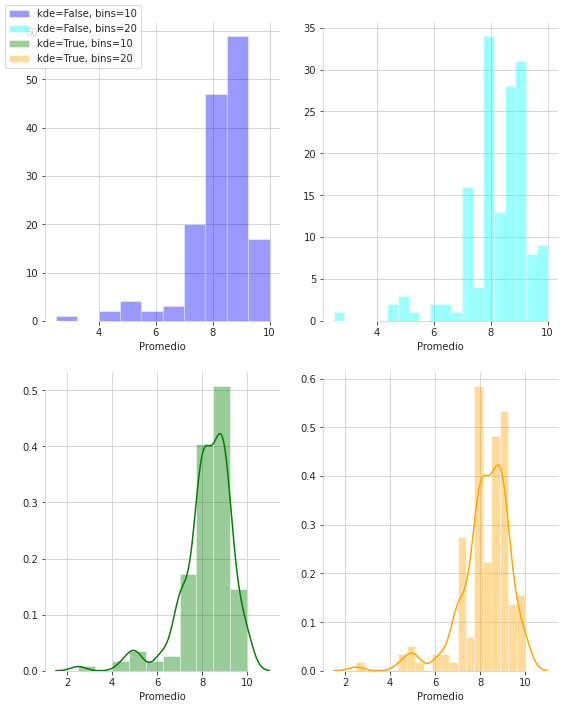

In [ ]:
f = plt.figure(figsize=(8, 10))
gs = f.add_gridspec(2, 2)
sns.set_style('whitegrid')

with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    ax = f.add_subplot(gs[0, 0])
    sns.distplot(df['Promedio'], kde=False, bins=10, label='kde=False, bins=10', color='Blue')
    sns.despine(trim=True)

with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    ax = f.add_subplot(gs[0, 1])
    sns.distplot(df['Promedio'], kde=False, bins=20, label='kde=False, bins=20', color='cyan')
    sns.despine(trim=True)

with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    ax = f.add_subplot(gs[1, 0])
    sns.distplot(df['Promedio'], kde=True, bins=10, label='kde=True, bins=10', color='green')
    sns.despine(trim=True)


with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    ax = f.add_subplot(gs[1, 1])
    sns.distplot(df['Promedio'], kde=True, bins=20, label='kde=True, bins=20', color='orange')
    sns.despine(trim=True)

f.legend(loc='upper left')
f.tight_layout(pad=2.)
f.show()

## 21.

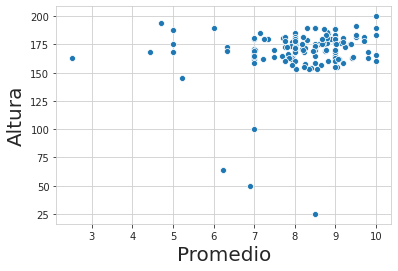

In [ ]:
with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    sns.scatterplot(x=df['Promedio'], y=df['Altura'])
    plt.xlabel(xlabel='Promedio', fontsize=20)
    plt.ylabel(ylabel='Altura', fontsize=20)
    plt.show()

## 22.

Supongo que debería haber alguna relación entre la altura del individuo y la altura de su padre.

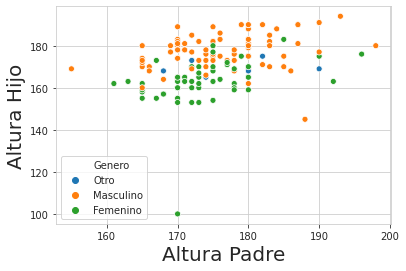

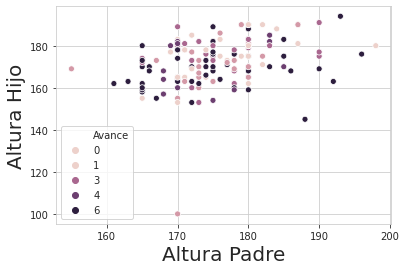

In [ ]:
for i in range(len(df['AlturaPapa'])):
    if df.loc[i, 'AlturaPapa'] <= 2.:
        df.loc[i, 'AlturaPapa'] = df.loc[i, 'AlturaPapa'] * 100

filtroA2 = df['AlturaPapa'] > 100
filtroA3 = df['AlturaPapa'] < 250

with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    sns.scatterplot(x=df['AlturaPapa'][filtroA2 & filtroA3], y=df['Altura'], hue=df['Genero'])
    plt.xlabel(xlabel='Altura Padre', fontsize=20)
    plt.ylabel(ylabel='Altura Hijo', fontsize=20)
    plt.show()

with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    sns.scatterplot(x=df['AlturaPapa'][filtroA2 & filtroA3], y=df['Altura'], hue=df['Avance'])
    plt.xlabel(xlabel='Altura Padre', fontsize=20)
    plt.ylabel(ylabel='Altura Hijo', fontsize=20)
    plt.show()

Los gráficos apoyan vagamente mi hipotesis.

## 23.

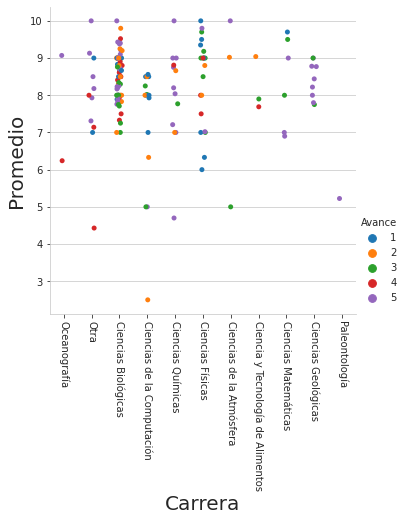

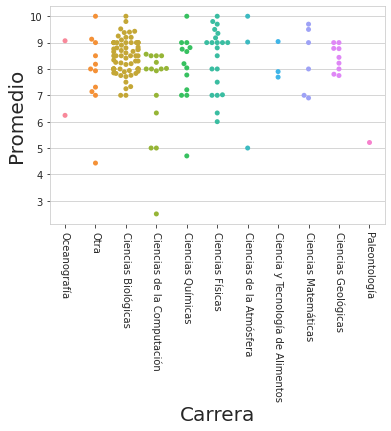

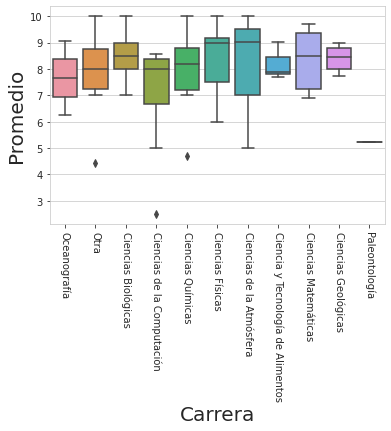

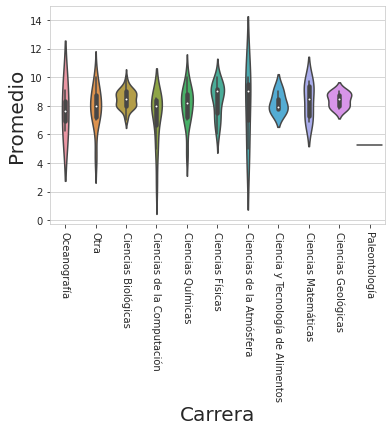

In [ ]:
# Con Catplot
with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    sns.catplot(data=df, x='Carrera', y='Promedio', hue='Avance')
    plt.xticks(rotation=-90)
    plt.xlabel(xlabel='Carrera', fontsize=20)
    plt.ylabel(ylabel='Promedio', fontsize=20)
    plt.show()

# Con Swarmplot
with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    sns.swarmplot(data=df, x='Carrera', y='Promedio')
    plt.xticks(rotation=-90)
    plt.xlabel(xlabel='Carrera', fontsize=20)
    plt.ylabel(ylabel='Promedio', fontsize=20)
    plt.show()

# Con Swarmplot
with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    sns.boxplot(data=df, x='Carrera', y='Promedio')
    plt.xticks(rotation=-90)
    plt.xlabel(xlabel='Carrera', fontsize=20)
    plt.ylabel(ylabel='Promedio', fontsize=20)
    plt.show()

# Con Violinplot
with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    sns.violinplot(data=df, x='Carrera', y='Promedio')
    plt.xticks(rotation=-90)
    plt.xlabel(xlabel='Carrera', fontsize=20)
    plt.ylabel(ylabel='Promedio', fontsize=20)
    plt.show()

De estos gráficos puedo inferir que para los datos de la muestra, no existe correlación entre las carreras y el promedio ni el avance.

## 24.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


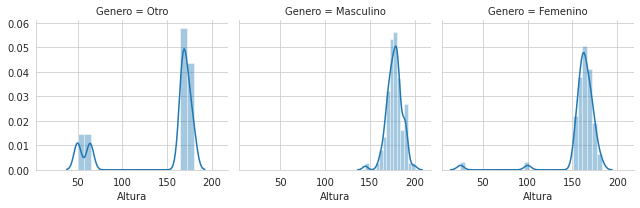

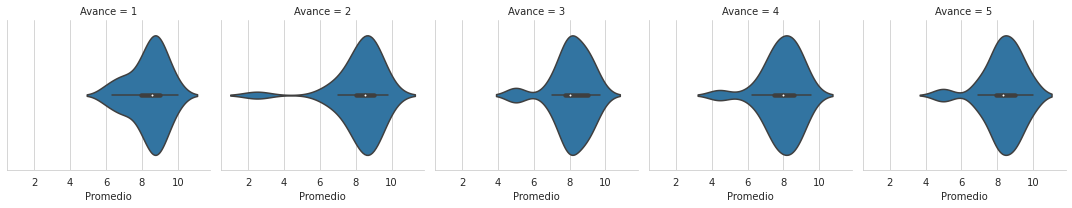

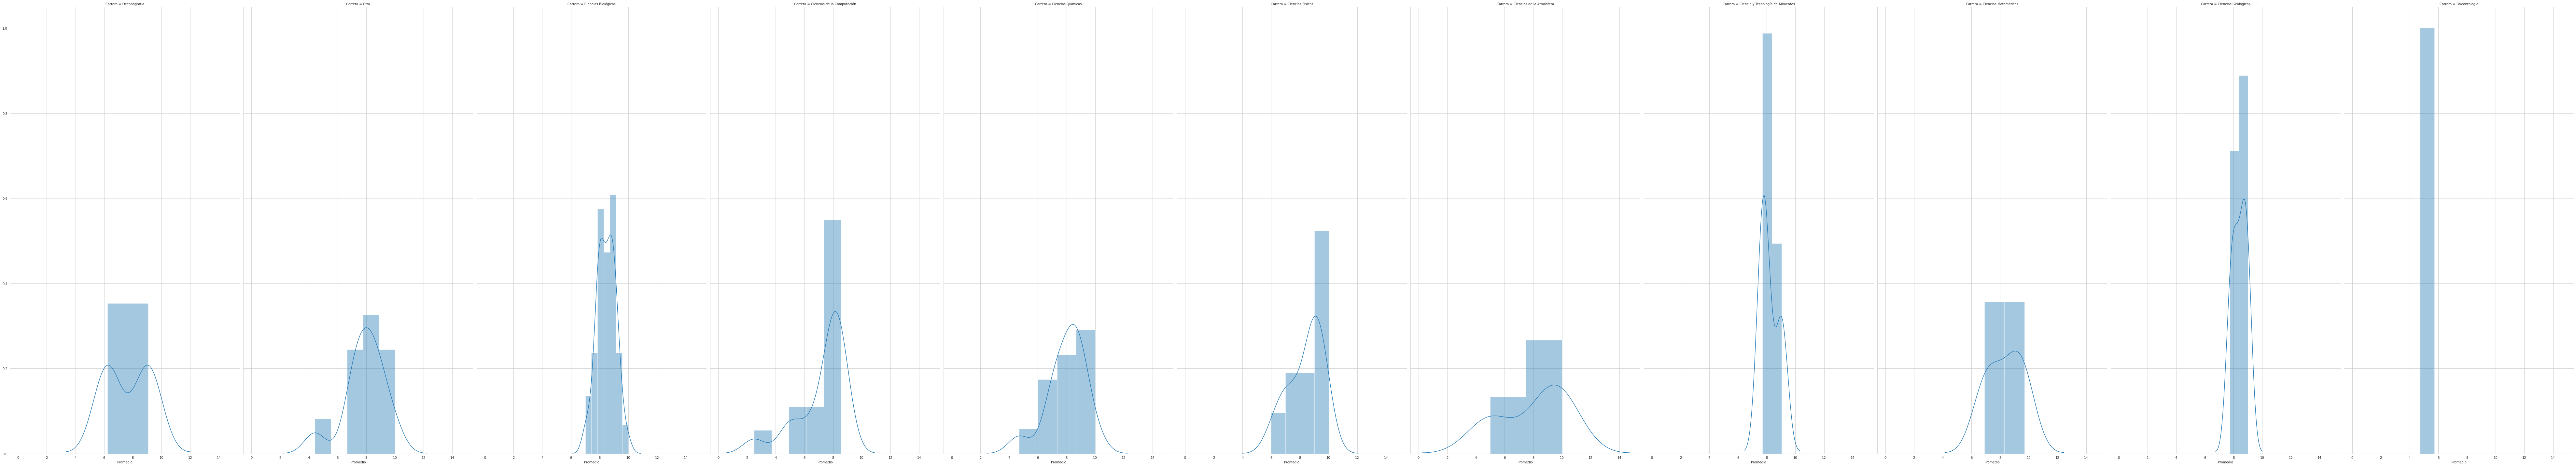

In [ ]:
grid = sns.FacetGrid(df, col='Genero', margin_titles=True)
grid.map(sns.distplot, 'Altura')

grid = sns.FacetGrid(df, col='Avance', margin_titles=True)
grid.map(sns.violinplot, 'Promedio')

grid = sns.FacetGrid(df, col='Carrera', margin_titles=True, height=20, aspect=0.5)
grid.map(sns.distplot, 'Promedio')

# **Optativos**

In [ ]:
# 25.(*Optativo 1*)

pabellon_1 = {'Ciencias Físicas', 'Ciencias Matemáticas', 'Ciencias de la Computación'}
pabellon_2 = {'Ciencias Biológicas', 'Ciencias Geológicas', 'Ciencias Químicas', 'Ciencias de la Atmósfera', 'Oceanografía', 'Paleontología'}

def dame_pabellon(carrera):
    if carrera in pabellon_1:
        return 1
    if carrera in pabellon_2:
        return 2
    else:
        return 0

df['Pabellón'] = df['Carrera'].apply(dame_pabellon)

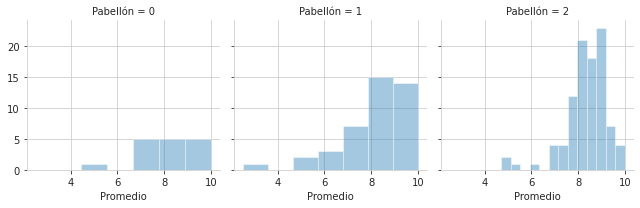

In [ ]:
with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    grid = sns.FacetGrid(df, col='Pabellón', margin_titles=True)
    grid.map(sns.distplot, 'Promedio', kde=False)

In [ ]:
# 26.(*Optativo 2: Quiénes estiman mejor?*)

estitoro = {}
for i in carreras:
    carrerai = df[df['Carrera'] == i]
    estitoro[i] = carrerai['Toro'].mean()
estitoro = pd.DataFrame.from_dict(data=estitoro, orient='index', columns=['PromedioToro'])

def errortoro(estimacion):
    pesotoro = 814.
    return(abs(estimacion - pesotoro))

estitoro['Error'] = estitoro['PromedioToro'].apply(errortoro)
print('La carrera que mejor estimó el peso del toro fue ' + estitoro['Error'].idxmin() + '.')

La carrera que mejor estimó el peso del toro fue Oceanografía.


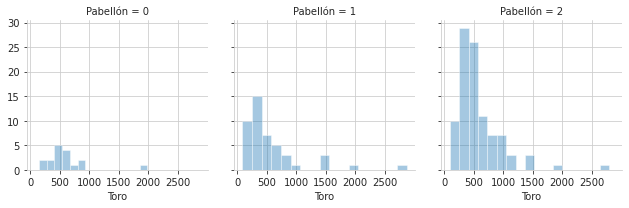

Aparentemente no hay muchas diferencias en las distribuciones a la hora de predecir el peso del toro en los distintos pabellones, 
teniendo en cuenta la diferente cantidad de muestras.


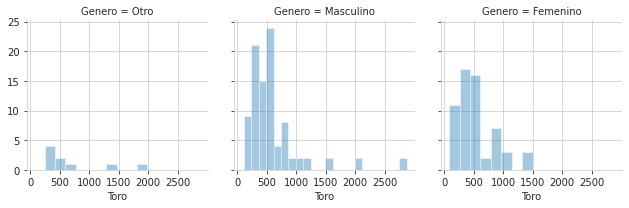

Lo mismo puede decirse del género.


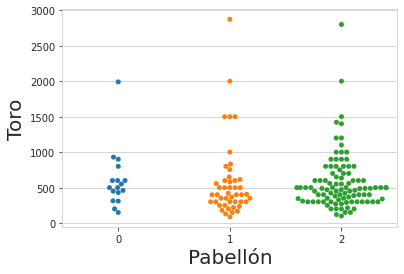

In [ ]:
# Este primer plot hace gráficos poco informativos por culpa de algunos datos muy extremos.
#with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
#    grid = sns.FacetGrid(df, col='Pabellón', margin_titles=True)
#    grid.map(sns.violinplot, 'Toro')

# En este segundo plot se filtraron estimaciones muy extremas.
with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    grid = sns.FacetGrid(df[df['Toro'] < 3000], col='Pabellón', margin_titles=True)
    grid.map(sns.distplot, 'Toro', kde=False)
    plt.xticks(np.arange(0, 3000, 500))
    plt.show()
print('Aparentemente no hay muchas diferencias en las distribuciones a la hora de predecir el peso del toro en los distintos pabellones, ')
print('teniendo en cuenta la diferente cantidad de muestras.')
with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    grid = sns.FacetGrid(df[df['Toro'] < 3000], col='Genero', margin_titles=True)
    grid.map(sns.distplot, 'Toro', kde=False)
    plt.xticks(np.arange(0, 3000, 500))
    plt.show()
print('Lo mismo puede decirse del género.')
with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    sns.swarmplot(data=df[df['Toro'] < 3000], x='Pabellón', y='Toro')
    plt.xlabel(xlabel='Pabellón', fontsize=20)
    plt.ylabel(ylabel='Toro', fontsize=20)

In [ ]:
# 27.(*Optativo 3*)
def getapellido(X):
    apellido = str()
    if isinstance(X, str):
        for i in X:
            if i == ',' or i == ' ' or i == '.':
                break
            if i == '"':
                continue
            apellido += i
    if len(apellido) == 0:
        apellido = np.nan
    return apellido

In [ ]:
df['Apellido'] = df['ApellidoNombre'].apply(getapellido)
print(df[['ApellidoNombre', 'Apellido']])

          ApellidoNombre   Apellido
0            Bob Esponja        Bob
1    Diamandis, Bagheera  Diamandis
2           Olmos, Justo      Olmos
3       Cinico, Diogenes     Cinico
4        Máximo Cozzetti     Máximo
..                   ...        ...
159          Stacy, Gwen      Stacy
160               Mariaa     Mariaa
161     Carpincho, Maca   Carpincho
162          Toro Julián       Toro
163     Natalia, Natalia    Natalia

[164 rows x 2 columns]


In [ ]:
G = 0
for i in range(len(df['Apellido'])):
    apellido = df['Apellido'].apply(getapellido)[i]
    if isinstance(apellido, float):
        continue
    if apellido[0] == 'g' or apellido[0] == 'G':
        G += 1
print(G, 'apellidos empiezan con la letra g')

11 apellidos empiezan con la letra g


In [ ]:
repe = df['Apellido'].duplicated()
print('La lista de apellidos repetidos es')
df[repe]['Apellido']

La lista de apellidos repetidos es


11       Max
80      Fort
129      NaN
158      NaN
159    Stacy
Name: Apellido, dtype: object

In [ ]:
def contar_vocales(X):
    vocales = 'AaÁáÂâÄäÅåEeÉéÊêËëIiÍíÎîÏïOoÓóÔôÖöUuÚúÛûÜüŮů'
    count = 0
    if isinstance(X, str):
        for i in X:
            if i in vocales:
                count += 1
    return count

In [ ]:
promvocales = df['Apellido'].apply(contar_vocales).mean()
print('El número promedio de vocales por apellido es ', round(promvocales, 3))

El número promedio de vocales por apellido es  2.512
